In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as plt_ex

def countMissingValues(df, attr):
    count = df[attr].isna().sum()
    print(count, "missing", attr, "values")
    return count

In [2]:
datasetTweetsCSVPath = "./dataset/tweets.csv"

# Tweets: Overview

In [3]:
df_tweets = pd.read_csv(datasetTweetsCSVPath, sep=',', index_col=0)

In [4]:
numberOfRows, numberOfColumns = df_tweets.shape
print("rows =", numberOfRows)
print("columns =", numberOfColumns)

rows = 13664696
columns = 9


In [5]:
df_tweets.head()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
509354017856950272,327746321,0,0,0,0,0,0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
583002592529121280,333722906,1,0,0,0,0,1,2020-04-01 20:27:04,"""@BestWSHHVids: how do you say these words wit..."
461498835362013185,2379755827,0,0,0,0,0,1,2019-05-02 13:34:31,@LOLatComedy awsome
528808127366692864,466226882,0,0,0,0,0,0,2019-11-04 07:17:37,Stephen Hawkins: i buchi neri non esistono se ...
575336690904006656,1355537995,114,0,0,1,0,1,2020-03-11 16:45:31,RT @tibbs_montris: So ready for Wednesday!


In [6]:
df_tweets.dtypes

user_id           object
retweet_count     object
reply_count       object
favorite_count    object
num_hashtags      object
num_urls          object
num_mentions      object
created_at        object
text              object
dtype: object

In [7]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13664696 entries, 509354017856950272 to 486479812614451200
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         object
 1   retweet_count   object
 2   reply_count     object
 3   favorite_count  object
 4   num_hashtags    object
 5   num_urls        object
 6   num_mentions    object
 7   created_at      object
 8   text            object
dtypes: object(9)
memory usage: 1.0+ GB


In [8]:
df_tweets.shape

(13664696, 9)

In [9]:
df_tweets.describe()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
count,13447413,13227562,13016818,13017154,12607172,13016073,12810531,13664696,13126975
unique,222285,229167,158619,158763,104779,157145,131538,8127084,6778478
top,497404180,0,0,0,0,0,0,2020-04-04 03:43:02,"Ci sedemmo dalla parte del torto, visto che tu..."
freq,4600,9419784,11790440,9467209,10470209,9894198,7561627,133,6932


In [10]:
#df_tweets_duplicated = df_tweets.duplicated(keep='first')

In [11]:
#df_tweets_duplicated.sum()

In [12]:
#df_tweets_drop_duplicates = df_tweets.drop_duplicates(keep='first')

In [13]:
#df_tweets_drop_duplicates.shape

# Tweets: Attributes analysis

## Index

In [14]:
df_tweets.index.dtype

dtype('O')

In [15]:
uniqueTweetsCount = len(df_tweets.index.unique())
print(uniqueTweetsCount, "/", numberOfRows, "\t\t")

11672136 / 13664696 		


In [16]:
print(df_tweets.index.isna().sum(), "missing indexes")
df_tweets[df_tweets.index.isna()]

2 missing indexes


,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
NaN,466475273,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-08 07:09:46,NaN
NaN,87334609,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-13 01:10:44,NaN


In [17]:
df_tweets.index.duplicated(keep='first').sum()

1992560

## User_id

In [18]:
len(df_tweets.user_id.unique())

222286

In [19]:
countMissingValues(df_tweets, "user_id")

217283 missing user_id values


217283

## Retweet_count

In [20]:
missingRetweetCount = countMissingValues(df_tweets, "retweet_count")
missingRetweetCount

437134 missing retweet_count values


437134

In [21]:
def IsNumber(num):
    try:
        val = float(num)
        return not math.isnan(val)# and not float.is_integer(val)
    except ValueError:
        return False

numbers = df_tweets.retweet_count.apply(IsNumber).sum()
print("Number of not nan integers or floats:", numbers)
print("Number of NaN values or strings:", numberOfRows-numbers)
print("Number of strings:", numberOfRows-numbers-missingRetweetCount)

Number of not nan integers or floats: 13039245
Number of NaN values or strings: 625451
Number of strings: 188317


## Reply_count

In [22]:
countMissingValues(df_tweets, "reply_count")

647878 missing reply_count values


647878

## Favorite_count

In [23]:
countMissingValues(df_tweets, "favorite_count")

647542 missing favorite_count values


647542

## Num_hashtags

In [24]:
countMissingValues(df_tweets, "num_hashtags")

1057524 missing num_hashtags values


1057524

## Num_urls

In [25]:
countMissingValues(df_tweets, "num_urls")

648623 missing num_urls values


648623

## Num_mentions

In [26]:
countMissingValues(df_tweets, "num_mentions")

854165 missing num_mentions values


854165

## Created_at

In [27]:
countMissingValues(df_tweets, "created_at")

0 missing created_at values


0

In [30]:
df_tweets.created_at = pd.to_datetime(df_tweets.created_at, format='%Y-%m-%d %H:%M:%S')
df_tweets.dtypes

user_id                   object
retweet_count             object
reply_count               object
favorite_count            object
num_hashtags              object
num_urls                  object
num_mentions              object
created_at        datetime64[ns]
text                      object
dtype: object

In [32]:
df_tweets.created_at.max()

Timestamp('2040-04-27 11:03:25')

In [31]:
df_tweets.created_at.min()

Timestamp('1953-04-17 12:24:33')

In [34]:
# Group by year
created_at_by_year = df_tweets.groupby([df_tweets.created_at.dt.year.rename("year")]).created_at.agg(count="count").reset_index()
created_at_by_year

,year,count
0,1953,22
1,1954,267
2,1955,144
3,1956,263
4,1957,425
5,1958,2760
6,1959,8590
7,1960,36332
8,2012,9
9,2013,551


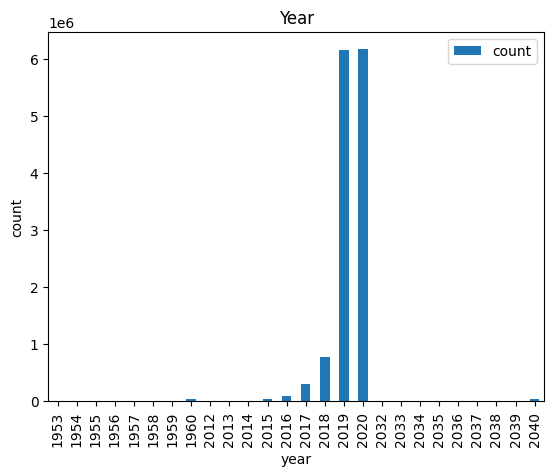

In [35]:
created_at_by_year.plot(kind='bar', title='Year', x="year", y="count")
plt.ylabel("count")
plt.show()

## Text

In [28]:
countMissingValues(df_tweets, "text")

537721 missing text values


537721